### AUTH

In [ ]:
# Cloud authentication.
from google.colab import auth
auth.authenticate_user()

In [ ]:
# Import, authenticate and initialize the Earth Engine library.
import ee
ee.Authenticate()
ee.Initialize(project='ee-garrettchrisman24')

### **Geometries**

In [ ]:
import ee
import folium
from IPython.display import HTML

#Initialize the Earth Engine API
ee.Initialize()

#Define the study area
geometryPINEGULCH = ee.Geometry.Polygon(
        [[[-108.80164742558028, 39.28402267340665],
          [-108.23722481815841, 39.29358857295844],
          [-108.23997140018966, 39.56831366828538],
          [-108.79752755253341, 39.553491364366145]
          ]])

geometryGRIZZLYCREEK = ee.Geometry.Polygon(
        [[[-107.40066503796388, 39.69746161256133],
          [-107.39860510144044, 39.46619798632684],
          [-106.90834020886231, 39.46778823854969],
          [-106.96670507702638, 39.74763415825682],
          [-107.40272497448731, 39.73337830588799]
          ]])

geometryCHERRYCANYON = ee.Geometry.Polygon(
        [[[-103.53011965523325, 37.51499254964799],
          [-103.53011965523325, 37.336135915833296],
          [-103.33785891304575, 37.33176822282621],
          [-103.33785891304575, 37.519349567331446]]]);

geometrySILVERCREEK = ee.Geometry.Polygon(
        [[[-105.29672060223413, 37.6911297494477],
          [-105.29672060223413, 37.35348518722596],
          [-104.96850404949976, 37.35348518722596],
          [-104.96850404949976, 37.6911297494477]]]);
# 2017-07-19

geometryDECKER = ee.Geometry.Polygon(
        [[[-106.02963654395263, 38.479133428395656],
          [-106.02963654395263, 38.38392784402862],
          [-105.91977326270263, 38.38392784402862],
          [-105.91977326270263, 38.479133428395656]]]);

# 2019-09-08

geometryLAKECHRIST = ee.Geometry.Polygon(
        [[[-107.09745152809535, 39.473198422531205],
          [-107.09745152809535, 39.36445604809376],
          [-106.97797520973597, 39.36445604809376],
          [-106.97797520973597, 39.473198422531205]]]);
#2018-07-30

geometryPALATEAU = ee.Geometry.Polygon(
        [[[-108.55952873183622, 37.67620981411429],
          [-108.55952873183622, 37.534774582410634],
          [-108.39198722792997, 37.534774582410634],
          [-108.39198722792997, 37.67620981411429]]]);


geometries_dict = {
    'PineGulch': geometryPINEGULCH,
    'GrizzlyCreek': geometryGRIZZLYCREEK,
    'CherryCanyon': geometryCHERRYCANYON,
    'SilverCreek': geometrySILVERCREEK,
    'Decker': geometryDECKER,
    'LakeChrist': geometryLAKECHRIST,
    'Palateau': geometryPALATEAU
}

geometries = [
    geometryPINEGULCH,
    geometryGRIZZLYCREEK,
    geometryCHERRYCANYON,
    geometrySILVERCREEK,
    geometryDECKER,
    geometryLAKECHRIST,
    geometryPALATEAU
]

geometryPALATEAU.getInfo()

In [ ]:
def get_fire_boundary(event_id):
    dataset = ee.FeatureCollection('USFS/GTAC/MTBS/burned_area_boundaries/v1')
    filtered_dataset = dataset.filter(ee.Filter.eq('Event_ID', event_id))

    if filtered_dataset.size().getInfo() > 0:
        selected_fire = ee.Feature(filtered_dataset.first())
        fire_geometry = selected_fire.geometry()
        geometry_type = fire_geometry.type().getInfo()

        if geometry_type == 'Polygon':
            coordinates = fire_geometry.coordinates().getInfo()
            fire_polygon = ee.Geometry.Polygon(coordinates)
            return fire_polygon
        elif geometry_type == 'GeometryCollection':
            geometries = fire_geometry.geometries().getInfo()
            fire_multipolygon = ee.Geometry.MultiPolygon(geometries)
            return fire_multipolygon
        else:
            print(f"Unsupported geometry type: {geometry_type}")
            return None
    else:
        print(f"No features found with the specified Event_ID: {event_id}")
        return None


event_id_PineGulch = 'CO3933610852620200731'
event_id_GrizzlyCreek = 'CO3957210726620200810'
event_id_CherryCanyon = 'CO3736710345020200520'
event_id_Decker = 'CO3840910600420190908'
event_id_LakeChrist = 'CO3937110704320180703'
event_id_Palateau = 'CO3765810847420180722'
event_id_SilverCreek = 'CO4022310665520180719'


event_id_dict = {
    'PineGulch': 'CO3933610852620200731',
    'GrizzlyCreek': 'CO3957210726620200810',
    'CherryCanyon': 'CO3736710345020200520',
    'Decker': 'CO3840910600420190908',
    'LakeChrist': 'CO3937110704320180703',
    'Palateau': 'CO3765810847420180722',
    'SilverCreek': 'CO4022310665520180719'
}

fire_boundaries = {}

#for fire_name, event_id in event_id_dict.items():
#    fire_boundary = get_fire_boundary(event_id)
#
#    if fire_boundary is not None:
#        fire_boundaries[fire_name] = fire_boundary
#        print(f"Added fire boundary for {fire_name} to the fire_boundaries dictionary:")
#        print(fire_boundaries[fire_name].getInfo())

for fire_name, polygon in geometries_dict.items():
    #fire_boundary = get_fire_boundary(polygon)

    if polygon is not None:
        fire_boundaries[fire_name] = polygon
        print(f"Added fire boundary for {fire_name} to the fire_boundaries dictionary:")
        print(fire_boundaries[fire_name].getInfo())

### **DATES**

In [ ]:
fire_dates = {
    'PineGulch': {
        'prefire_start': '2020-05-20',
        'prefire_end': '2020-06-18',
        'postfire_start': '2020-09-20',
        'postfire_end': '2020-10-28'
    },
    'GrizzlyCreek': {
        'prefire_start': '2020-05-20',
        'prefire_end': '2020-07-18',
        'postfire_start': '2020-09-06',
        'postfire_end': '2020-11-01'
    },
    'CherryCanyon':{
        'prefire_start': '2020-04-20',
        'prefire_end': '2020-05-15',
        'postfire_start': '2020-07-01',
        'postfire_end': '2020-08-15'
    },
    'SilverCreek': { #Done
        'prefire_start': '2021-06-01',
        'prefire_end': '2021-08-10',
        'postfire_start': '2019-05-10',
        'postfire_end': '2019-06-30'
    },
    'Decker': { # Kinda - not a huge fan of.... shadowing due to mountains east to west
        'prefire_start': '2019-05-30',
        'prefire_end': '2019-07-25',
       'postfire_start': '2020-5-10',
       'postfire_end': '2020-6-20'
    },
    'LakeChrist': { # done
        'prefire_start': '2017-08-01',
        'prefire_end': '2017-10-15',
        'postfire_start': '2018-09-15',
        'postfire_end': '2018-10-30'
    },
    'Palateau': { #Done
        'prefire_start': '2018-05-10',
        'prefire_end': '2018-06-20',
        'postfire_start': '2019-05-10',
        'postfire_end': '2019-06-20'
    }
}

fire_names = [
    'PineGulch',
    'GrizzlyCreek',
    'CherryCanyon',
    'Decker',
    'LakeChrist',
    'Palateau',
    'SilverCreek'
]

### **READ and SPLIT IMAGE**

In [ ]:
from sklearn.model_selection import train_test_split
import os
from osgeo import gdal
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from google.colab import drive
from skimage.filters import threshold_minimum
import numpy as np

def split_image_into_patches(image, patch_size, overlap_factor=2):
    height, width = image.shape
    patches = []
    stride = patch_size // overlap_factor
    for i in range(0, height - patch_size + 1, stride):
        for j in range(0, width - patch_size + 1, stride):
            patch = image[i:i+patch_size, j:j+patch_size]
            patches.append(patch)
    return np.array(patches)

#def split_image_into_patches_test(image, patch_size): No overlap for test
def split_image_into_patches_test(image, patch_size):
    height, width = image.shape
    patches = []
    stride = patch_size  #No overlap
    for i in range(0, height - patch_size + 1, stride):
        for j in range(0, width - patch_size + 1, stride):
            patch = image[i:i+patch_size, j:j+patch_size]
            patches.append(patch)
    return np.array(patches)

def read_geotiff(file_path):
    dataset = gdal.Open(file_path, gdal.GA_ReadOnly)
    if dataset is None:
        print(f"Failed to open file: {file_path}")
        return None
    if dataset.RasterCount < 1:
        print(f"No raster bands found in file: {file_path}")
        return None
    band = dataset.GetRasterBand(1)
    data = band.ReadAsArray()
    return data

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **PATCHING**

In [ ]:

# Set the working directory to the Google Drive path
google_drive_path = "/content/drive/MyDrive/Cleaned_Fire_images_TIFF"
os.chdir(google_drive_path)

# Constants
patch_size = 256
threshold = 0.45

def normalize_image(image, epsilon=1e-10):
    min_val = np.min(image)
    max_val = np.max(image)
    range_val = max_val - min_val
    range_safe = max(range_val, epsilon)
    return (image - min_val) / range_safe if range_val > 0 else image

def read_and_preprocess_image(file_path):
    image = read_geotiff(file_path)  # Assume read_geotiff is defined elsewhere
    return normalize_image(image)

def plot_images(images, titles):
    fig, axes = plt.subplots(1, len(images), figsize=(10, 5))
    for ax, image, title in zip(axes, images, titles):
        ax.imshow(image, cmap='gray')
        ax.set_title(title)
        ax.axis('off')
    plt.show()

def enhance_changes(image, threshold=0.85, factor=100, power=0.5):
    image_scaled = image * factor

    image_transformed = np.where(image_scaled < (threshold * factor),
                                 np.power(image_scaled, power),
                                 image_scaled)
    image_transformed /= factor

    return image_transformed

selected_images = ['PineGulch']  # List of selected images for processing

dnbr_images = []
ground_truth_images = []

for fire_name in selected_images:
    dnbr_file_path = f'S1/RATIO/S1_ratio_{fire_name}.tif'
    ground_truth_file_path = f'S2/Resized_S2/TEST/resized_S2_{fire_name}_test.tif'

    dnbr_image = read_and_preprocess_image(dnbr_file_path)
    ground_truth_image = read_and_preprocess_image(ground_truth_file_path)

    binary_ground_truth_image = (ground_truth_image > threshold).astype(np.uint8)

    # Plot DNBR and ground truth images
    plot_images([dnbr_image, binary_ground_truth_image], ['DNBR Image', 'Ground Truth Image'])

    # Split images into patches
    dnbr_patches = split_image_into_patches(dnbr_image, patch_size, overlap_factor=2)
    ground_truth_patches = split_image_into_patches(binary_ground_truth_image, patch_size, overlap_factor=2)

    dnbr_images.append(dnbr_patches)
    ground_truth_images.append(ground_truth_patches)

    # Debug prints for shapes
    print('DNBR Image Shape:', dnbr_image.shape)
    print('Binary Ground Truth Image Shape:', binary_ground_truth_image.shape)

# Combine all dnbr and ground truth patches if splitting was performed
dnbr_images = np.concatenate(dnbr_images)
ground_truth_images = np.concatenate(ground_truth_images)

# Additional debug prints for final shapes
print('Combined DNBR Images Shape:', dnbr_images.shape)
print('Combined Ground Truth Images Shape:', ground_truth_images.shape)


In [ ]:
plt.figure(figsize=(6, 6))
plt.hist(dnbr_image.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('DNBR Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(6, 6))
plt.hist(binary_ground_truth_image.flatten(), bins=50, color='green', alpha=0.7)
plt.title('S2 Raw Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# patches
dnbr_patches_sample = dnbr_images[:10]
ground_truth_patches_sample = ground_truth_images[:10]

fig, axes = plt.subplots(10, 2, figsize=(10, 50))

for i in range(10):
    # Show dNBR patch
    ax = axes[i, 0]
    ax.imshow(dnbr_patches_sample[i], cmap='gray')
    ax.set_title(f'dNBR patch {i}')

    # Show ground truth patch
    ax = axes[i, 1]
    ax.imshow(ground_truth_patches_sample[i], cmap='gray')
    ax.set_title(f'Ground truth patch {i}')

plt.tight_layout()
plt.show()

In [ ]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
threshold = 0.45

#dnbr_image = read_geotiff(file_path)

print("Minimum dNBR value:", np.min(dnbr_image))
print("Maximum dNBR value:", np.max(dnbr_image))
print("Mean (Average) dNBR value:", np.mean(dnbr_image))
print("Standard Deviation (SD) of dNBR:", np.std(dnbr_image))
print("Median dNBR value:", np.median(dnbr_image))
print("Sum of dNBR values:", np.sum(dnbr_image))
print("Variance of dNBR values:", np.var(dnbr_image))

#Histo
plt.hist(dnbr_image.flatten(), bins=50, color='c')
plt.title("Histogram of dNBR values")
plt.show()

binary_ground_truth_image_threshold = (binary_ground_truth_image > threshold).astype(np.uint8)
binary_ground_truth_image_threshold

#Vis
plt.imshow(binary_ground_truth_image_threshold, cmap='gray')
plt.title("Binary Ground Truth Image")
plt.show()

In [ ]:
from ipywidgets import widgets, interactive

# Assuming dnbr_image and binary_ground_truth_image are already defined

# Define function to update plots based on threshold value
def update(threshold):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # dNBR image thresholded
    dnbr_image_t = (dnbr_image > threshold).astype(np.uint8)
    ax = axes[0]
    ax.imshow(dnbr_image_t, cmap='gray')
    ax.set_title('dNBR Image Thresholded')

    # Ground truth thresholded
    binary_ground_truth_image_t = (binary_ground_truth_image > threshold).astype(np.uint8)
    ax = axes[1]
    ax.imshow(binary_ground_truth_image_t, cmap='gray')
    ax.set_title('Ground Truth Image Thresholded')

    plt.tight_layout()
    plt.show()

# Create interactive slider
threshold_slider = widgets.FloatSlider(
    value=0.5,  # Adjust the initial value as needed
    min=0,
    max=1,
    step=0.05,
    description='Threshold:',
    continuous_update=False
)

# Display the widget
interactive(update, threshold=threshold_slider)


### **CNN**

In [ ]:
print(len(dnbr_images))
print(len(ground_truth_images))

print(len(dnbr_patches))
print(len(ground_truth_patches))

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Input, Conv2DTranspose, concatenate
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Lambda, Input

In [ ]:
from tensorflow.keras.models import load_model

#unet_model = create_unet_model()
#loaded_model = load_model('/content/drive/MyDrive/Cleaned_Fire_images_TIFF/Case1:BaseCase/unet_model_case1.5.30_RES.h5')
#unet_model = loaded_model
#combined_model  = loaded_model

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Input, Conv2DTranspose, concatenate
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

def learning_rate_schedule(epoch):
    if epoch < 30:
        return 0.00001  # first 30 epochs
    else:
        return 0.000001  # last 20 epochs

def create_unet_model(input_shape=(256,256, 1)):
    inputs = Input(shape=input_shape)

    # Encoder
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = BatchNormalization()(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    p1 = Dropout(0.25)(p1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = BatchNormalization()(c2)
    p2 = MaxPooling2D((2, 2))(c2)
    p2 = Dropout(0.25)(p2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = BatchNormalization()(c3)
    p3 = MaxPooling2D((2, 2))(c3)
    p3 = Dropout(0.25)(p3)

    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = BatchNormalization()(c4)
    p4 = MaxPooling2D((2, 2))(c4)
    p4 = Dropout(0.25)(p4)

    # Bottom
    b = Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    b = BatchNormalization()(b)

    # Decoder
    u1 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(b)
    u1 = concatenate([u1, c4])
    u1 = Dropout(0.25)(u1)
    d1 = Conv2D(512, (3, 3), activation='relu', padding='same')(u1)
    d1 = BatchNormalization()(d1)

    u2 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(d1)
    u2 = concatenate([u2, c3])
    u2 = Dropout(0.25)(u2)
    d2 = Conv2D(256, (3, 3), activation='relu', padding='same')(u2)
    d2 = BatchNormalization()(d2)

    u3 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(d2)
    u3 = concatenate([u3, c2])
    u3 = Dropout(0.25)(u3)
    d3 = Conv2D(128, (3, 3), activation='relu', padding='same')(u3)
    d3 = BatchNormalization()(d3)

    u4 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(d3)
    u4 = concatenate([u4, c1])
    u4 = Dropout(0.25)(u4)
    d4 = Conv2D(64, (3, 3), activation='relu', padding='same')(u4)
    d4 = BatchNormalization()(d4)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(d4)

    model = Model(inputs=inputs, outputs=outputs)
   # model.compile(optimizer=Adam(learning_rate=0.00001), loss=BinaryCrossentropy(from_logits=False), metrics=['binary_accuracy'])
    return model

lr_scheduler = LearningRateScheduler(learning_rate_schedule)
unet_model = create_unet_model()

unet_model.compile(optimizer=Adam(learning_rate=0.00001),  # Start with initial learning rate
                   loss=BinaryCrossentropy(from_logits=False),
                   metrics=['binary_accuracy'])

# Train the model
X_train, X_test, y_train, y_test = train_test_split(dnbr_images, ground_truth_images, test_size=0.3)

X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

batch_size = 32
epochs = 30
model_cnn = unet_model.fit(X_train, y_train,
                               batch_size,
                               epochs,
                               validation_data=(X_test, y_test),
                               callbacks=[lr_scheduler])


In [ ]:
# saving and loading the model
from tensorflow.keras.models import load_model

#unet_model.save('/content/drive/MyDrive/Cleaned_Fire_images_TIFF/unet_model_case1_RES_50_CHOP.h5')
#combined_model.save('/content/drive/MyDrive/Cleaned_Fire_images_TIFF/unet_model_case1_RES_50_CHOP.h5')
#loaded_model = load_model('/content/drive/MyDrive/Cleaned_Fire_images_TIFF/unet_model.h5')


In [ ]:
unet_model.summary()
#combined_model.summary()
#tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(model_cnn.history).plot(
    figsize=(8, 5), xlim=[0,50], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
#save_fig("keras_learning_curves_plot")  # extra code

save_path = '/content/drive/MyDrive/Cleaned_Fire_images_TIFF/keras_learning_curves_plot_RESNET_.png'
plt.savefig(save_path, format='png')

plt.show()


In [ ]:
from tensorflow.keras.utils import plot_model

#plot_model(combined_model, to_file='unet_model.png', show_shapes=True, show_layer_names=True)

### **ReCONSTRUCT IMAGES**

In [ ]:
def reconstruct_image_from_patches(patches, original_shape, patch_size, overlap_factor=2):
    height, width = original_shape
    reconstructed_image = np.zeros(original_shape)
    patch_count = np.zeros(original_shape)
    stride = patch_size // overlap_factor
    patch_idx = 0

    for i in range(0, height - patch_size + 1, stride):
        for j in range(0, width - patch_size + 1, stride):
            reconstructed_image[i:i+patch_size, j:j+patch_size] += patches[patch_idx]
            patch_count[i:i+patch_size, j:j+patch_size] += 1
            patch_idx += 1

    reconstructed_image /= patch_count
    return reconstructed_image

def reconstruct_image_from_patches_test(patches, original_shape, patch_size):
    height, width = original_shape
    reconstructed_image = np.zeros(original_shape)
    stride = patch_size  #No overlap
    patch_idx = 0
    for i in range(0, height - patch_size + 1, stride):
        for j in range(0, width - patch_size + 1, stride):
            reconstructed_image[i:i+patch_size, j:j+patch_size] = patches[patch_idx]
            patch_idx += 1

    return reconstructed_image

In [ ]:

dnbr_images_expanded = dnbr_images[..., np.newaxis]
predictions = unet_model.predict(dnbr_images_expanded)

#Reconstruct the image from the patches
predictions = predictions[..., 0]
reconstructed_image = reconstruct_image_from_patches(predictions, dnbr_image.shape, patch_size, overlap_factor=2)


In [ ]:
#pip install rasterio

In [ ]:
from PIL import Image
from skimage import exposure

def save_image_as_jpeg(image_array, output_path):
    image_array = image_array * 500
    image_uint8 = Image.fromarray(image_array.clip(0, 255).astype(np.uint8))
    image_uint8.save(output_path)


import rasterio
def save_image_as_tif(image_path, save_path):
    with rasterio.open(image_path) as src:
        with rasterio.open(save_path, 'w', driver='GTiff',
                           width=src.width, height=src.height,
                           count=src.count, dtype=src.dtypes[0],
                           crs=src.crs, transform=src.transform) as dst:
            dst.write(src.read())

output_tif_path = '.tif'
output_jpeg_path = '.jpeg'

#save_image_as_tif(reconstructed_image, output_tif_path)
save_image_as_jpeg(reconstructed_image, output_jpeg_path)

### **RUNNING CNN**

In [ ]:
# Read and preprocess the new image
fire_name = fire_names[6]

new_image_path = f'S1/RATIO/S1_ratio_{fire_name}.tif'


new_image = read_geotiff(new_image_path)
preprocessed_new_image = new_image

preprocessed_new_image_2 = enhance_changes(preprocessed_new_image)
preprocessed_new_image_3 = normalize_image(preprocessed_new_image)

#preprocessed_new_image_4 = (preprocessed_new_image_3 > 0.75).astype(np.uint8)

patch_size = 256
new_image_patches = split_image_into_patches_test(preprocessed_new_image_3, patch_size)

new_image_patches_expanded = new_image_patches[..., np.newaxis]

new_image_predictions = unet_model.predict(new_image_patches_expanded)

new_image_predictions = new_image_predictions[..., 0]

print("Prediction Min:", new_image_predictions.min())
print("Prediction Max:", new_image_predictions.max())

reconstructed_new_image = reconstruct_image_from_patches_test(new_image_predictions, new_image.shape, patch_size)

threshold = 0.50

burned_area_mask = (reconstructed_new_image > threshold).astype(np.uint8)

print("Prediction Min:", reconstructed_new_image.min())
print("Prediction Max:", reconstructed_new_image.max())

output_tif_path = f'{fire_name}_Case1.tif'
output_jpeg_path = f'{fire_name}_Case1.jpeg'

#save_image_as_tif(reconstructed_new_image, output_tif_path, new_image_path)
#save_image_as_jpeg(reconstructed_new_image, output_jpeg_path)

print("Min pixel value:", np.min(reconstructed_new_image))
print("Max pixel value:", np.max(reconstructed_new_image))
print("Mean pixel value:", np.mean(reconstructed_new_image))
print("Standard Deviation:", np.std(reconstructed_new_image))

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(reconstructed_new_image.flatten(), bins=30, alpha=0.7)
plt.title('Histogram of Pixel Value Distributions')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### **EVALUATIONS**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


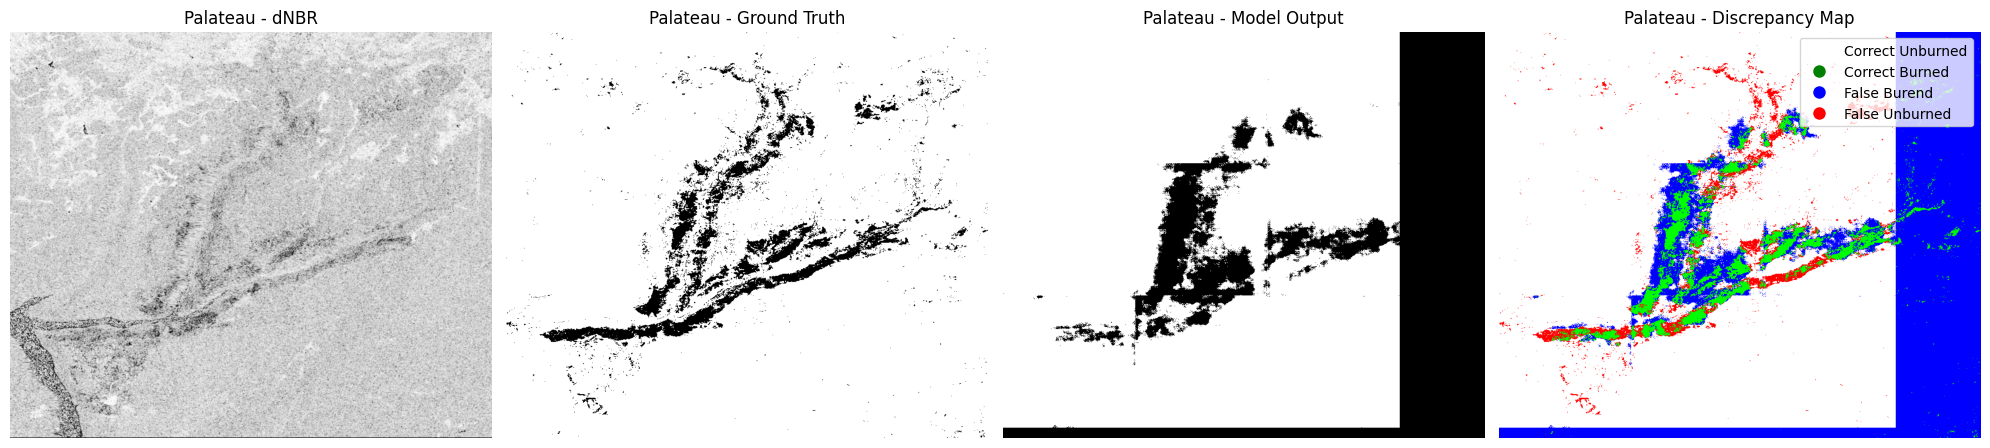

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from matplotlib.colors import ListedColormap
import os
from osgeo import gdal

from google.colab import drive
drive.mount('/content/drive')

google_drive_path = "/content/drive/MyDrive/Cleaned_Fire_images_TIFF"
os.chdir(google_drive_path)

def calculate_metrics(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1_score = 2 * (precision * recall) / (precision + recall)
    iou = TP / (TP + FP + FN)
    rel_bias = (TP + FP) / (TP + FN) - 1

    return precision, recall, f1_score, iou, rel_bias

def trim_images_to_smallest(image1, image2):
    shape1 = np.array(image1.shape)
    shape2 = np.array(image2.shape)
    min_shape = np.minimum(shape1, shape2)
    return image1[:min_shape[0], :min_shape[1]], image2[:min_shape[0], :min_shape[1]]

def trim_to_ground_truth(ground_truth, predicted):
    """Crop the predicted image to match the shape of the ground truth."""
    return ground_truth, predicted[:ground_truth.shape[0], :ground_truth.shape[1]]

def center_crop_to_ground_truth(ground_truth, predicted):
    """Center-crop the predicted image to match the size of the ground truth."""
    gt_rows, gt_cols = ground_truth.shape
    pred_rows, pred_cols = predicted.shape

    center_row, center_col = pred_rows // 2, pred_cols // 2
    half_gt_rows, half_gt_cols = gt_rows // 2, gt_cols // 2

    start_row = max(center_row - half_gt_rows, 0)
    end_row = start_row + gt_rows
    start_col = max(center_col - half_gt_cols, 0)
    end_col = start_col + gt_cols

    return ground_truth, predicted[start_row:end_row, start_col:end_col]

def normalize_image(image, epsilon=1e-10):
    min_val = np.min(image)
    max_val = np.max(image)
    range_val = max_val - min_val
    if range_val == 0:
        return image
    else:
        range_safe = np.maximum(range_val, epsilon)
        return (image - min_val) / range_safe

def read_geotiff(file_path):
    dataset = gdal.Open(file_path, gdal.GA_ReadOnly)
    if dataset is None:
        print(f"Failed to open file: {file_path}")
        return None
    if dataset.RasterCount < 1:
        print(f"No raster bands found in file: {file_path}")
        return None
    band = dataset.GetRasterBand(1)
    data = band.ReadAsArray()
    return data

fires = ['CherryCanyon', 'GrizzlyCreek','PineGulch', 'SilverCreek', "Decker", "LakeChrist",'Palateau']
fires = ['Palateau']

for fire in fires:
    dnbr1 = read_geotiff(f'S1/RATIO/S1_ratio_{fire}.tif')
    dnbr = normalize_image(dnbr1)

    ground_truth = read_geotiff(f'S2/Resized_S2/TEST/resized_S2_{fire}_test.tif')
    ground_truth1 = normalize_image(ground_truth)
    ground_truth_binary = (ground_truth1 > 0.45).astype(np.uint8)

    model_output1 = cv2.imread(f'Case1:BaseCase/S1_256_test_{fire}_UNET1.Case1.30_C.jpeg', cv2.IMREAD_GRAYSCALE)

    model_output_norm = model_output1 / 255.0
    model_output = np.round(model_output_norm).astype(np.uint8)

    #Discrepancy map
    discrepancy_rgb = np.zeros((*ground_truth_binary.shape, 3), dtype=np.uint8)

    discrepancy_rgb[np.logical_and(ground_truth_binary == 1, model_output == 1)] = [255, 255, 255]  # white (true unburned)
    discrepancy_rgb[np.logical_and(ground_truth_binary == 0, model_output == 0)] = [0, 255, 0]      # green (true burned)
    discrepancy_rgb[np.logical_and(ground_truth_binary == 1, model_output == 0)] = [0, 0, 255]      # blue (false positives)
    discrepancy_rgb[np.logical_and(ground_truth_binary == 0, model_output == 1)] = [255, 0, 0]      # red (false negatives)


    #Vis
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))

    axes[0].imshow(dnbr, cmap='gray')
    axes[0].set_title(f'{fire} - dNBR')
    axes[0].axis('off')

    axes[1].imshow(ground_truth_binary, cmap='gray')
    axes[1].set_title(f'{fire} - Ground Truth')
    axes[1].axis('off')

    axes[2].imshow(model_output, cmap='gray')
    axes[2].set_title(f'{fire} - Model Output')
    axes[2].axis('off')

    im = axes[3].imshow(discrepancy_rgb)
    axes[3].set_title(f'{fire} - Discrepancy Map')
    axes[3].axis('off')


    from matplotlib.lines import Line2D
    legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='white', markersize=10, label='Correct Unburned'),
                       Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Correct Burned'),
                       Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='False Burend'),
                       Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='False Unburned')]
    axes[3].legend(handles=legend_elements, loc='upper right')

    plt.tight_layout()
    plt.show()

    #print("Ground Truth Min:", ground_truth_binary.min(), "Max:", ground_truth_binary.max())
    #print("Model Output Min:", model_output.min(), "Max:", model_output.max())
    #print(results_table)



In [ ]:
import pandas as pd
import numpy as np

fire_names = fires


metrics_dict = {
    'Fire Name': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'IoU': [],
    'Relative Bias': []
}

for fire_name in fire_names:

    ground_truth = read_geotiff(f'S2/Resized_S2/TEST/resized_S2_{fire_name}_test.tif')
    ground_truth1 = normalize_image(ground_truth)
    ground_truth_binary = (ground_truth1 > 0.40).astype(np.uint8)

    model_output1 = cv2.imread(f'Case1:BaseCase/S1_256_test_{fire}_UNET1.Case1.30_G.jpeg', cv2.IMREAD_GRAYSCALE)
    model_output_norm = model_output1 / 255.0
    model_output = np.round(model_output_norm).astype(np.uint8)

    ground_truth_binary, model_output = trim_images_to_smallest(ground_truth_binary, model_output)

    y_true = ground_truth_binary# Your ground truth array for this fire
    y_pred =  model_output# Your predicted array for this fire

    precision, recall, f1_score, iou, rel_bias = calculate_metrics(y_true, y_pred)

    # Add the calculated metrics to the dictionary
    metrics_dict['Fire Name'].append(fire_name)
    metrics_dict['Precision'].append(precision)
    metrics_dict['Recall'].append(recall)
    metrics_dict['F1 Score'].append(f1_score)
    metrics_dict['IoU'].append(iou)
    metrics_dict['Relative Bias'].append(rel_bias)


metrics_df = pd.DataFrame(metrics_dict)

print((metrics_df))
